In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#import tensorflow.keras.models as Models
#import tensorflow.keras.layers as Layers
#import tensorflow.keras.activations as Activations
#import tensorflow.keras.optimizers as Optimizer
#import tensorflow.keras.metrics as Metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
        #print(dirname)
        
dirname = '/kaggle/input/intel-image-classification/seg_train/seg_train'
labels = np.array(os.listdir(dirname));
Images = []
Labels = []
count = 0;

for image_labels in labels:
    file_name = os.path.join(dirname,image_labels);
    for images in os.listdir(file_name):
        image_read = cv2.imread(os.path.join(file_name, images))
        image_read = cv2.resize(image_read,(150,150))
        Images.append(image_read)
        Labels.append(count)
    count = count + 1;
    

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)
Epoch 1/35
439/439 [==============================] - 32s 73ms/step - loss: 2.7318 - accuracy: 0.4676
Epoch 2/35
439/439 [==============================] - 31s 72ms/step - loss: 0.8844 - accuracy: 0.6748
Epoch 3/35
439/439 [==============================] - 31s 72ms/step - loss: 0.6505 - accuracy: 0.7660
Epoch 4/35
439/439 [==============================] - 31s 71ms/step - loss: 0.4640 - accuracy: 0.8291
Epoch 5/35
439/439 [==============================] - 31s 71ms/step - loss: 0.3080 - accuracy: 0.8912
Epoch 6/35
439/439 [==============================] - 31s 71ms/step - loss: 0.2403 - accuracy: 0.9183
Epoch 7/35
439/439 [==============================] - 31s 71ms/step - loss: 0.1859 - accuracy: 0.9421
Epoch 8/35
439/439 [==============================] - 31s 72ms/step - loss: 0.1420 - accuracy: 0.9555
Epoch 9/35
439/439 [==============================] - 31s 71ms/step - loss: 0.1554 - accuracy: 0.9510
Epoch 10/35
439/43

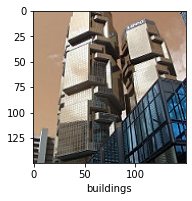

In [3]:
Images = np.array(Images)
Labels = np.array(Labels)
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)
plt.subplot(1,2,1)
plt.imshow(Images[0])
plt.xlabel(labels[Labels[0]])

#CNN Model

model = keras.Sequential([
    keras.layers.Conv2D(100,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
    keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(5,5),
    keras.layers.Flatten(),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

training = model.fit(Images,Labels,epochs=35)

In [4]:
dirname = '/kaggle/input/intel-image-classification/seg_test/seg_test'
TestImages = []
TestLabels = []
count = 0;

for image_labels in labels:
    file_name = os.path.join(dirname,image_labels);
    for images in os.listdir(file_name):
        image_read = cv2.imread(os.path.join(file_name, images))
        image_read = cv2.resize(image_read,(150,150))
        TestImages.append(image_read)
        TestLabels.append(count)
    count = count + 1;

TestImages = np.array(TestImages)
TestLabels = np.array(TestLabels)

model.evaluate(TestImages,TestLabels, verbose=1)

94/94 [==============================] - 2s 25ms/step - loss: 2.7234 - accuracy: 0.7027


[2.7234303951263428, 0.7026666402816772]

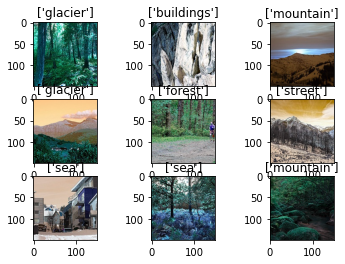

In [18]:
import random

fig = plt.figure(figsize=(20,20))
dirname = '/kaggle/input/intel-image-classification/seg_pred/seg_pred'
PredImages = []
PredLabels = []
count = 0;

for test_images in os.listdir(dirname):
    image_read = cv2.imread(os.path.join(dirname, test_images))
    image_read = cv2.resize(image_read,(150,150))
    PredImages.append(image_read)

PredImages = np.array(PredImages)

for i in range(9):
    RandomNumber = random.randint(0,len(PredImages))
    PredictionImage = np.array([PredImages[RandomNumber]])
    PredictionClass = model.predict_classes(PredictionImage)
    plt.subplot(3,3,i+1)
    plt.imshow(PredImages[i])
    plt.title(labels[PredictionClass])